In [2]:
# Grafikleri inline olarak işle
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # grafikleri daha güzel yap
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1 CSV dosyasından veri okuma

CSV dosyasından `read_csv` fonksiyonunu kullanarak veri okuyabiliriz. Varsayılan olarak verilerin virgülle ayrıldığını varsayar.

Montréal'de bisikletöilere ilişkin verileri inceleyeceğiz. [Orijinal sayfa buradadır](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (Fransızca). Fakat bu kaynakta veriler zaten mevcuttur. 2012 yılına ait veriler alınmıştır.

Veri kümesi Montréal'de 7 farklı bisiklet yolundan her gün geçen insan sayısını verir.each day.

In [3]:
broken_df = pd.read_csv('../data/bikes.csv')

In [4]:
# İlk 3 satıra bakalım
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Gördüğünüz gibi bir şeyler kesinlikle ters gitmiş. `read_csv` fonksiyonunun bir çok ayarı vardır ve bunun düzeltebiliriz. Şunları yapacağız:

* Sütun ayracını `;`'a dönüştüreceğiz
* kodlamayı `'latin1'`'e çevireceğiz (varsayılan değer `'utf8'`)
* 'Date' sütunundaki verileri işleyeceğiz
* Bizim verimizde ilk önce ay bilgisi yerine gün bilgisi bulunduğunu söyleyeceğiz
* 'Date' sütununu index değeri yapacağız

In [6]:
fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# 1.2 Sütun seçimi

Bir CSV dosyası okuduğunuzda satır ve sütunlardan oluşan bir `DataFrame` nesnesi elde edersiniz. Sütunları seçmenin yolu dictionary den veri almakla aynıdır.

Bir örnek vermek gerekirse:

In [7]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

# 1.3 Sütunu grafiğe dökmek

Sadece sonuna `.plot()` ekliyoruz. Daha kolay olabilir miydi? =)

Gördüğümüz üzere beklenebileceği gibi Ocak, Şubat ve Mart aylarında pek fazla kişi bisiklet sürmüyor.

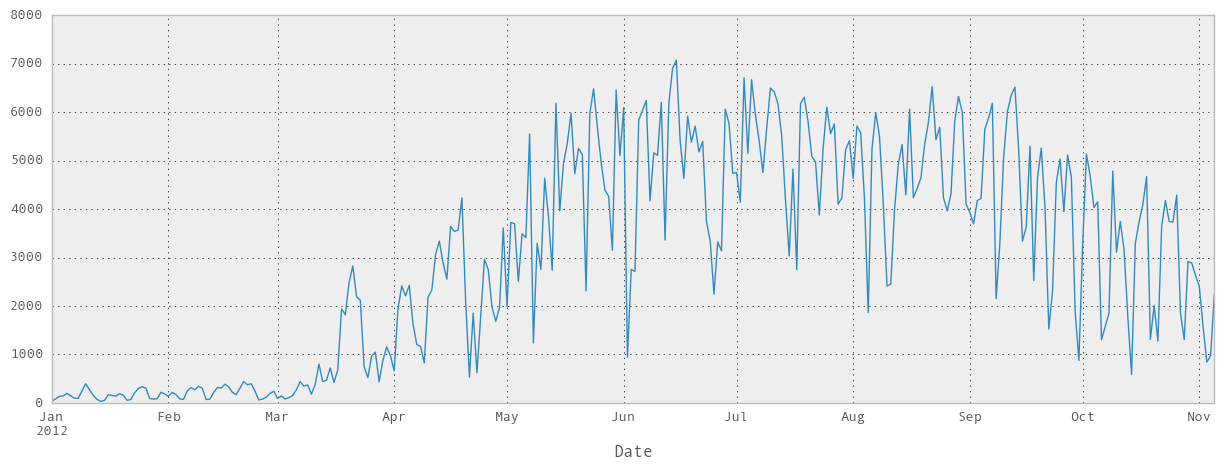

In [8]:
fixed_df['Berri 1'].plot()

Bütün sütunları da kolayca grafiğe dökebiliriz. Biraz daha büyütebiliriz de.

Görebileceğiniz gibi biraz iç içe geçmiş durumda fakat bütün bisiklet yolları temelde aynı şekilde. Eğer bisikletçiler için kötü bir günse heryerde kötü bir yer.

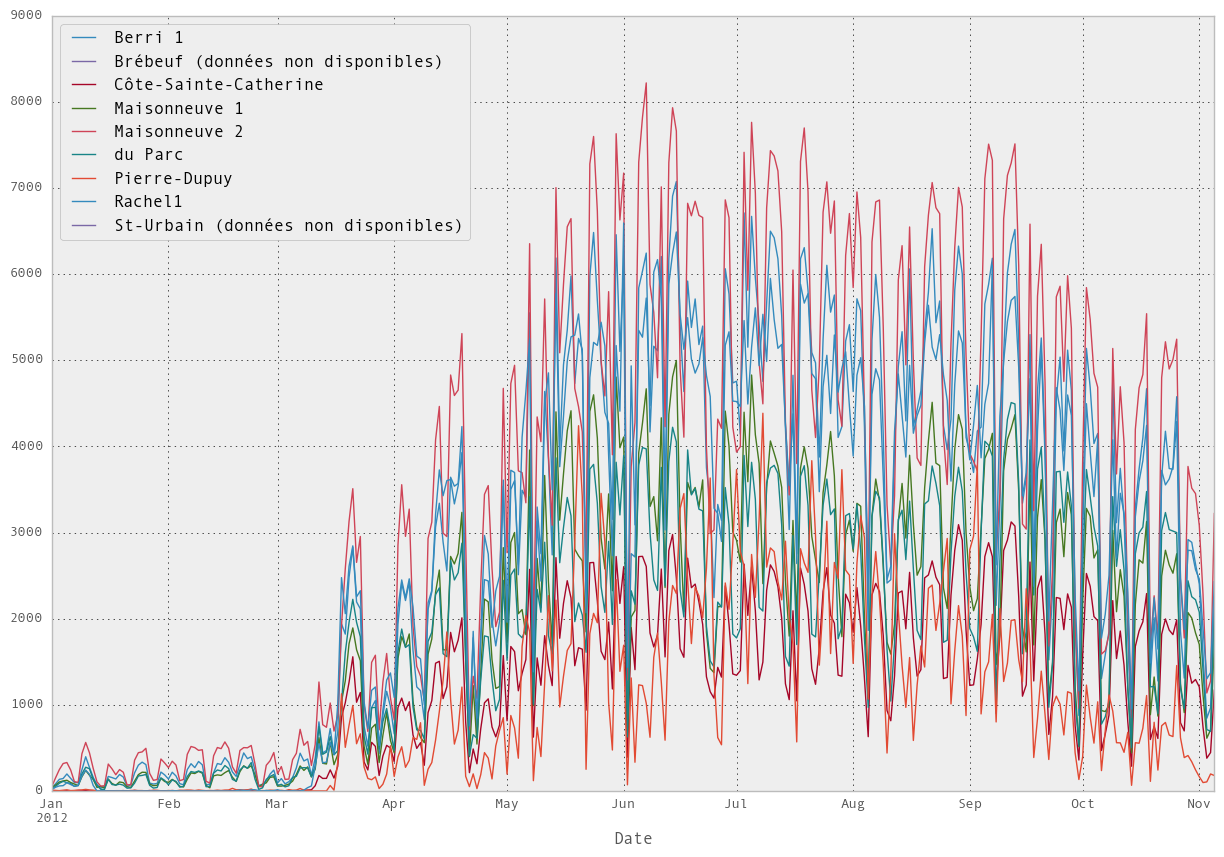

In [9]:
fixed_df.plot(figsize=(15, 10))

# 1.4 Herşeyi bir araya getirmek

Hepsini bir seferde yapmak için ihtiyacımız olan kod aşşağıdaki gibi:

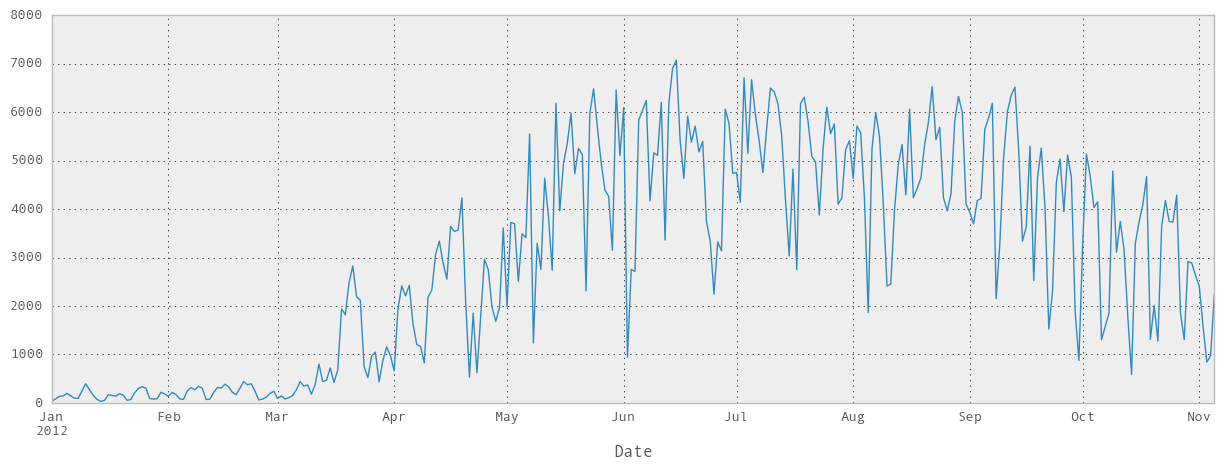

In [10]:
df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  